In [33]:
import polyglot
from utils.utils import *
from polyglot.text import Text
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests
import itertools
import utils
from glob import glob as gb
from tqdm import tqdm

In [34]:
language = "bg"
base_path = "/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase"
months = month_generator("2019-01","2020-08")
days = day_generator("2019-01-01","2020-09-01")
days_num = {m:c for c,m in enumerate(days)}
months_num = {m:c for c,m in enumerate(months)}

In [37]:
# df = pd.read_csv(os.path.join(base_path,"data","covid-subsets",f"{language}-covid-subset.txt"),sep='\t')
# df = df.dropna()
# df.columns = ['id','text']
# df['id'] = [str(x).split(':')[1] for x in df['id']]
#df = utils.utils.import_all(language,'lemmatized')
df = utils.utils.load_freq_df('/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase/results/frequencies/bg/експерт_експерти_учен_учени_наука_експертиза_знания_информация_мерки_политика_програма-2019_09-2020_07.txt')
df = df.dropna()

In [38]:
def chen_classifier(text):
    text = text.split(' ')
    pos_words = set(pd.read_csv(base_path + f'/resources/lexicons/sentiment-lexicons/positive_words_{language}.txt',header=None)[0])
    neg_words = set(pd.read_csv(base_path + f'/resources/lexicons/sentiment-lexicons/negative_words_{language}.txt',header=None)[0])
    s =0
    for w in text:
        if w in pos_words or w in neg_words:
            s += 1
    return s / len(text)

def polyglot_classifier(text):
    text = Text(text)
    r = sum([w.polarity for w in text.words]) / len(text.words)
    return r

def sentistrength_classifier(text,encoding):
    text = text.split(' ')
    def grouper(n, iterable, fillvalue=None):
        args = [iter(iterable)] * n
        return itertools.zip_longest(*args, fillvalue=fillvalue)

    with open(base_path + f'/resources/lexicons/sentistrength-lexicons/{language}.txt','r',encoding=encoding) as f:
        c = f.readlines()
        c = [x.replace('\n','').split('\t') for x in c]

    d = []
    for x in c:
        x = list(grouper(2,x))
        for i in x:
            d.append(i)
    d = [(x[0].replace(u'\xa0', u' ').replace(' ',''),x[1]) for x in d]
    #d = dict(d)
    return d

    s = []
    for w in text:
        if w in set(d.keys()):
            s += int(d[w])
    #return sum(s) / len(s)


In [43]:
res = []

for m in tqdm(months):
    ss = df[df['id'].str.contains(m)]
    ss = ss[ss['text'].str.len() > 100]
    if len(ss) == 0:
        continue

    for c,i in enumerate(ss['text']):
        try:
            #r1 = chen_classifier(i)
            r2 = polyglot_classifier(i)
            res.append([df['id'][c],m,r2])
        except Exception as e:
            print(e)

  0%|          | 0/19 [00:00<?, ?it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 63%|██████▎   | 12/19 [00:04<00:05,  1.26it/s]418
Detector is not able to detect the language reliably.
 79%|███████▉  | 15/19 [00:07<00:03,  1.10it/s]418
Detector is not able to detect the language reliably.
 89%|████████▉ | 17/19 [00:09<00:01,  1.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▍| 18/19 [00:10<00:01,  1.02s/it]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
100%|██████████| 19/19 [00:11<00:00,  1.67it/s]418



In [44]:
dr = pd.DataFrame(res,columns=['id','m','r2'])
dr

,id,m,r2
0,ParlaMint-BG_2019-09-04.txt:ParlaMint-BG_2019-...,2019-09,0.021164
1,ParlaMint-BG_2019-09-04.txt:ParlaMint-BG_2019-...,2019-09,0.017281
2,ParlaMint-BG_2019-09-04.txt:ParlaMint-BG_2019-...,2019-09,0.009915
3,ParlaMint-BG_2019-09-04.txt:ParlaMint-BG_2019-...,2019-09,0.005330
4,ParlaMint-BG_2019-09-04.txt:ParlaMint-BG_2019-...,2019-09,0.025237
...,...,...,...
4106,ParlaMint-BG_2019-10-04.txt:ParlaMint-BG_2019-...,2020-07,0.025926
4107,ParlaMint-BG_2019-10-04.txt:ParlaMint-BG_2019-...,2020-07,0.042155
4108,ParlaMint-BG_2019-10-04.txt:ParlaMint-BG_2019-...,2020-07,0.013304
4109,ParlaMint-BG_2019-10-04.txt:ParlaMint-BG_2019-...,2020-07,0.009494


<AxesSubplot:xlabel='m', ylabel='r2'>

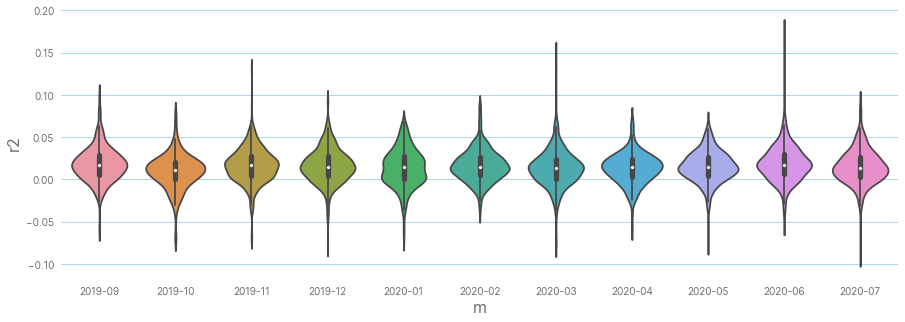

In [45]:
sns.set(font='Inter, Medium',rc={'axes.axisbelow': True,'axes.edgecolor': 'lightgrey','axes.facecolor': 'None', 'axes.grid': True,'grid.color':'lightblue','axes.labelcolor':'dimgrey','axes.spines.top': True,'figure.facecolor': 'white','lines.solid_capstyle': 'round','patch.edgecolor': 'w','patch.force_edgecolor': True,'text.color': 'dimgrey','xtick.bottom': False,'xtick.color': 'dimgrey','xtick.direction': 'out','xtick.top': False,'ytick.color': 'dimgrey','ytick.direction': 'out','ytick.left': False, 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":20, "axes.labelsize":16})
sns.set_palette("Accent",9)

fig = plt.figure(figsize=(15,5))
sns.violinplot(data=dr,x = 'm',y = 'r2')
#sns.stripplot(x="m", y="r1", data=dr,jitter=0.1,alpha=.3)

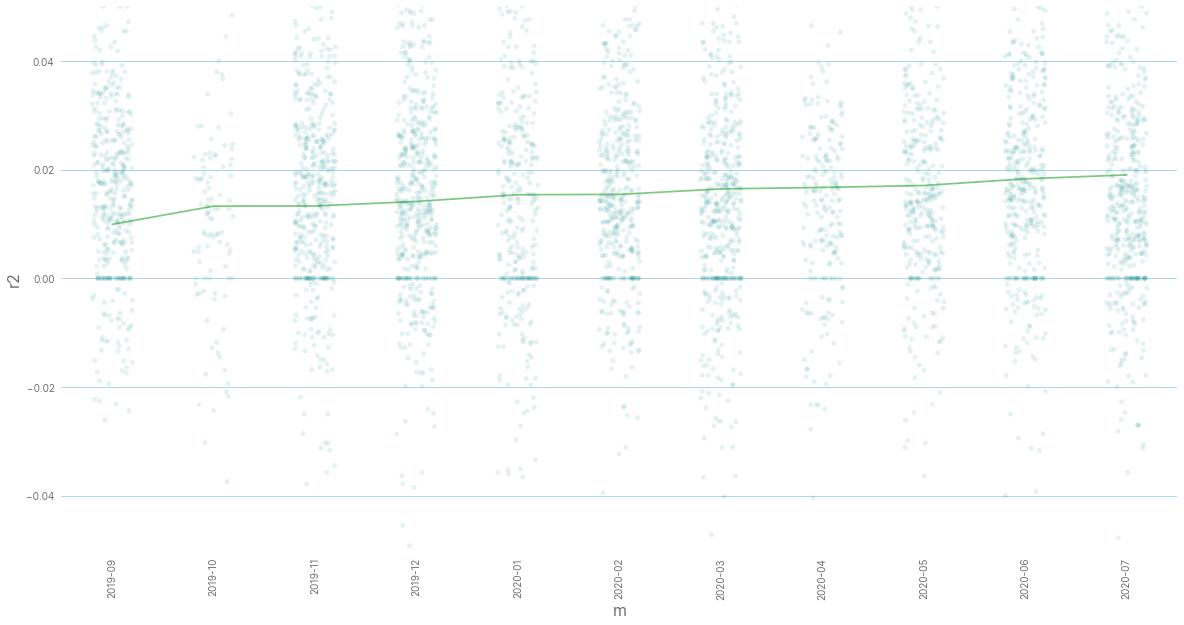

In [46]:
fig = plt.figure(figsize=(20,10))

p = sns.stripplot(x="m", y="r2", data=dr,jitter=0.2,alpha=.1,color='teal',size=5)
for label in p.get_xticklabels():
    label.set_rotation(90) 
plt.ylim(-0.05,0.05)

avgs = pd.DataFrame([[m,dr[dr['m'] == m]['r2'].sum() / len(dr[dr['m'] == m])] for m in set(dr['m'])],columns=['m','r2']).sort_values('r2')
plt.plot(avgs['m'],avgs['r2'])

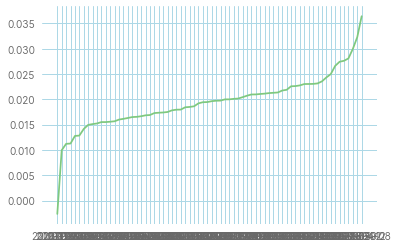

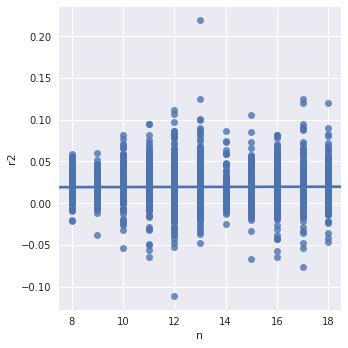

In [37]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
dr['n'] = [months_num[m] for m in dr['m']]
sns.lmplot(x="n",y="r2", data=dr)